In [1]:
from baselines.CPCA import cpca
import torch
import numpy as np
from dataset import set_random_seed
from dataset import NodeLevelDataset
from backbone.gnns import GCN_Increment
import importlib
from torch.nn import functional as F

def node_class_increment():
    ### device ###
    cuda_index = 'cuda:' + '0'
    device = torch.device(cuda_index if torch.cuda.is_available() else "cpu")

    ### set seed ###
    set_random_seed(0)
    
    m = "data"

    ### load dataset ###
    frac_list = [0.8,0.0,0.2]
    clss_task_list = [30,10,10,10,10] #CoreFull
    dataset_name = "CoraFull"
    NData = NodeLevelDataset(name=dataset_name, IL='class', default_split=False, ratio_valid_test = frac_list)

    inter_task_edge = False
    mini_batch = True

    args_model = {'h_dims':[256], 'd_data':NData.d_data, 'n_cls':sum(clss_task_list)}
    model = GCN_Increment(args=args_model)
    life_model = importlib.import_module(f"baselines.{m}_model")
    ### class-increment task ###
    model_CL =  life_model.NET(model, clss_task_list, device, inter_task_edge=inter_task_edge, mini_batch = mini_batch, dataset_name = dataset_name)
    model_CL.load_dataset(NData, clss_task_list)

    for task_id, task_class_num in enumerate(clss_task_list):
        model_CL.load_task_dataset(task_class=task_class_num, task_id=task_id)
        model_CL.end_task()

if __name__ == '__main__':
    node_class_increment()

/environment/miniconda3/lib/python3.7/site-packages/dgl/dataloading/dataloader.py:869: DGLWarning: Dataloader CPU affinity opt is not enabled, consider switching it on (see enable_cpu_affinity() or CPU best practices for DGL [https://docs.dgl.ai/tutorials/cpu/cpu_best_practises.html])
  dgl_warning(f'Dataloader CPU affinity opt is not enabled, consider switching it on '


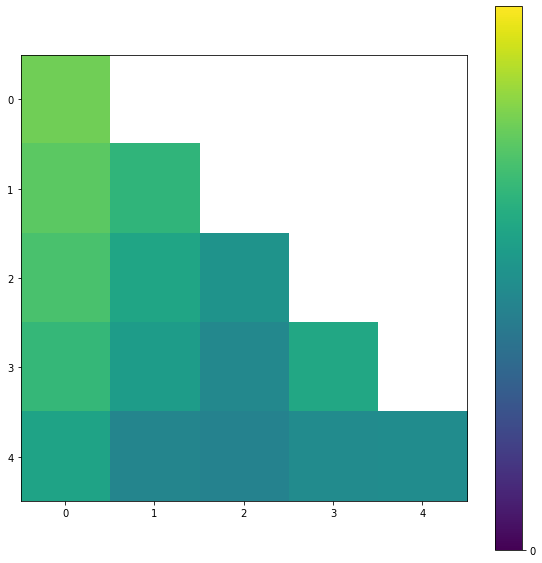

End!  the AP [0.7821388  0.69996633 0.60473851 0.57180255 0.48941502] the AF [ 0.         -0.03526736 -0.06737297 -0.08701262 -0.14696625]


In [1]:
from baselines.CPCA import cpca
import torch
import numpy as np
from dataset import set_random_seed
from dataset import NodeLevelDataset
from backbone.gnns import GCN_Increment
import importlib
from torch.nn import functional as F

def node_class_increment():
    ### device ###
    cuda_index = 'cuda:' + '0'
    device = torch.device(cuda_index if torch.cuda.is_available() else "cpu")

    ### set seed ###
    set_random_seed(0)
    
    m = "cpca"

    ### load dataset ###
    frac_list = [0.8,0.0,0.2]
    clss_task_list = [30,10,10,10,10] #CoreFull
    dataset_list = ["ogbn-arxiv","CoraFull","Reddit","Arxiv-CL","Products-CL"]
    dataset_name = dataset_list[1]
    NData = NodeLevelDataset(name=dataset_name, IL='class', default_split=False, ratio_valid_test = frac_list)

    inter_task_edge = False
    mini_batch = True

    args_model = {'h_dims':[256], 'd_data':NData.d_data, 'n_cls':clss_task_list[0]}
    model = GCN_Increment(args=args_model)

    ### class-increment task ###
    model_CL = cpca(model, clss_task_list[0], device, inter_task_edge=inter_task_edge, mini_batch = mini_batch, dataset_name = dataset_name, index = "1")
    model_CL.load_dataset(NData, clss_task_list)

    if_debug = True
    if_eval = True
    for task_id, task_class_num in enumerate(clss_task_list):
        model_CL.load_task_dataset(task_class=task_class_num, task_id=task_id)
        model_CL.before_train(task_id)
        model_CL.model_train(task_id, debug = if_debug, if_eval = if_eval, n_epoch = 100, lamb_kd= 0.1, lamb_se = 1, use_mu = False)
        model_CL.after_train(task_id)
        model_CL.cal_feature_class(task_id, debug = if_debug)
        model_CL.evaluation(task_id, clss_task_list)
        model_CL.end_task()

if __name__ == '__main__':
    node_class_increment()